###Data Exploration###

In [ ]:
import pandas as pd
import datetime as dt
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import pickle


In [ ]:
df = pickle.load(urlopen('https://drive.usercontent.google.com/u/0/uc?id=1hN_1LAMCoyRu_WXzSj1k9kOmM98zgiBm&export=download'))
df

,Date,Actual Price,Forecasted Load,Cleared Load,Actual Load,Retail Price(cents/kwhr),kwhrs,Precipitation (in) Chicago,Snowfall (in) Chicago,Max Temp (F) Chicago,...,Precipitation (in) Springfield,Snowfall (in) Springfield,Max Temp (F) Springfield,Min Temp (F) Springfield,Mean Temp (F) Springfield,Average Max Temp (F),Average Min Temp (F),Average Mean Temp (F),Average Precipitation (in),Average Snowfall (in)
0,2023-10-20 16:00:00,41.50,71410,72599,73812,15.75,2.634921,0.0,0.0,61.0,...,0.00,0.0,68.0,45.0,56.5,62.666667,46.333333,54.500000,0.083333,0.0
1,2023-10-20 17:00:00,92.50,71201,73940,73858,15.75,5.873016,0.0,0.0,61.0,...,0.00,0.0,68.0,45.0,56.5,62.666667,46.333333,54.500000,0.083333,0.0
2,2023-10-20 18:00:00,31.93,71200,76048,73281,15.75,2.027302,0.0,0.0,61.0,...,0.00,0.0,68.0,45.0,56.5,62.666667,46.333333,54.500000,0.083333,0.0
3,2023-10-20 19:00:00,26.58,71319,77348,73087,15.75,1.687619,0.0,0.0,61.0,...,0.00,0.0,68.0,45.0,56.5,62.666667,46.333333,54.500000,0.083333,0.0
4,2023-10-20 20:00:00,27.59,70508,73893,71105,15.75,1.751746,0.0,0.0,61.0,...,0.00,0.0,68.0,45.0,56.5,62.666667,46.333333,54.500000,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,2024-07-31 18:00:00,50.56,117585,117182,115967,15.35,3.293811,0.0,0.0,92.0,...,0.32,0.0,82.0,70.0,76.0,87.333333,70.000000,78.666667,0.106667,0.0
6428,2024-07-31 19:00:00,27.55,115484,116193,112798,15.35,1.794788,0.0,0.0,92.0,...,0.32,0.0,82.0,70.0,76.0,87.333333,70.000000,78.666667,0.106667,0.0
6429,2024-07-31 20:00:00,32.36,111855,114754,108578,15.35,2.108143,0.0,0.0,92.0,...,0.32,0.0,82.0,70.0,76.0,87.333333,70.000000,78.666667,0.106667,0.0
6430,2024-07-31 21:00:00,35.01,108298,109081,105087,15.35,2.280782,0.0,0.0,92.0,...,0.32,0.0,82.0,70.0,76.0,87.333333,70.000000,78.666667,0.106667,0.0


In [ ]:
def plot(x_class, y_class, rolling_days = 0, df = df):
  plt.figure(figsize=(20,10))
  plt.title(y_class + ' over Time')
  plt.xlabel(x_class)
  plt.ylabel(y_class)
  plt.plot(df[x_class], df[y_class], label = x_class)
  if rolling_days > 0:
    # Add a rolling average line if rolling_days is specified
    plt.plot(df[x_class], df[y_class].rolling(window=24*rolling_days).mean(), label = 'Rolling ' + str(rolling_days) + ' Day Average')
    plt.legend()
  plt.show()
  return

def scatter(x_class, y_class, df = df):
  plt.figure(figsize=(20,10))
  plt.title(y_class + ' by ' + x_class)
  plt.xlabel(x_class)
  plt.ylabel(y_class)
  plt.scatter(df[x_class], df[y_class])
  plt.show()
  return

def plot_cities(x_class, y_class, average = False, df = df):
  plt.figure(figsize=(20,10))
  plt.title(y_class + ' over Time')
  plt.xlabel(x_class)
  plt.ylabel(y_class)
  cities = ['Chicago', 'Champaign', 'Springfield']
  for city in cities:
    plt.plot(df[x_class], df[y_class + ' ' + city], label = city)
  if average:
    # Plot average values if requested
    plt.plot(df[x_class], df['Average ' + y_class], label = 'Average')
  plt.legend()
  plt.show()
  return

def bar_graph_months(y_class, df = df):
  plt.figure(figsize=(20,10))
  plt.title(y_class + ' over Time')
  plt.xlabel('Month')
  plt.ylabel(y_class)
  # Convert dates to month names for the x-axis
  plt.bar([i.strftime("%B") for i in list(df['Date'])], list(df[y_class]))
  plt.show()
  return

def bar_graph_seasons(y_class, df = df):
  plt.figure(figsize=(20,10))
  plt.title(y_class + ' over Time')
  plt.xlabel('Season')
  seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }
  # Map each date to its corresponding season
  x_data = [int(i.month) for i in df['Date']]
  x_data = ['Spring' if i in seasons['Spring'] else 'Summer' if i in seasons['Summer'] else 'Autumn' if i in seasons['Autumn'] else 'Winter' for i in x_data]
  plt.xlabel('Season')
  plt.ylabel(y_class)
  plt.bar(x_data, list(df[y_class]))
  plt.show()
  return

def pearsons_corr(df= df):
  # Remove the Date column before computing correlations
  df_nodate = df.drop('Date', axis=1)
  corr_matrix = df_nodate.corr()

  plt.figure(figsize=(20, 10))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
  plt.title("Pearson Correlation Heatmap")
  plt.show()
  return


# def bar_graph_cities(y_class, df = df):
#   plt.figure(figsize=(20,10))
#   plt.title(y_class + ' over Time')
#   plt.xlabel('Seasons')
#   seasons = {
#         'Spring': (3, 4, 5),
#         'Summer': (6, 7, 8),
#         'Autumn': (9, 10, 11),
#         'Winter': (12, 1, 2)
#     }
#   x_data = [int(i.month) for i in df['Date']]
#   x_data = ['Spring' if i in seasons['Spring'] else 'Summer' if i in seasons['Summer'] else 'Autumn' if i in seasons['Autumn'] else 'Winter' for i in x_data]
#   plt.ylabel(y_class)
#   cities = ['Chicago', 'Champaign', 'Springfield']
#   for city in cities:
#     plt.bar(x_data, list(df[y_class + ' ' + city]), label = city)
#   plt.legend()
#   plt.show()
#   return

There are 116 negative actual prices

In [ ]:
print(df['Actual Price'].min(), (df['Actual Price'] < 0).sum())
df.sort_values('Actual Price').head(5)

-140.02 116


,Date,Actual Price,Forecasted Load,Cleared Load,Actual Load,Retail Price(cents/kwhr),kwhrs,Precipitation (in) Chicago,Snowfall (in) Chicago,Max Temp (F) Chicago,...,Precipitation (in) Springfield,Snowfall (in) Springfield,Max Temp (F) Springfield,Min Temp (F) Springfield,Mean Temp (F) Springfield,Average Max Temp (F),Average Min Temp (F),Average Mean Temp (F),Average Precipitation (in),Average Snowfall (in)
1914,2024-01-14 10:00:00,-140.02,88474,95720,89901,14.93,-9.378433,0.05,0.05,3.0,...,0.0,0.0,-3.0,-12.0,-7.5,6.333333,-11.0,-2.333333,0.02,0.083333
1916,2024-01-14 12:00:00,-66.79,88309,93008,88224,14.93,-4.473543,0.05,0.05,3.0,...,0.0,0.0,-3.0,-12.0,-7.5,6.333333,-11.0,-2.333333,0.02,0.083333
1917,2024-01-14 13:00:00,-59.33,87576,91291,87438,14.93,-3.973878,0.05,0.05,3.0,...,0.0,0.0,-3.0,-12.0,-7.5,6.333333,-11.0,-2.333333,0.02,0.083333
1915,2024-01-14 11:00:00,-56.04,88729,94272,89032,14.93,-3.753516,0.05,0.05,3.0,...,0.0,0.0,-3.0,-12.0,-7.5,6.333333,-11.0,-2.333333,0.02,0.083333
1919,2024-01-14 15:00:00,-50.23,86203,89540,87268,14.93,-3.364367,0.05,0.05,3.0,...,0.0,0.0,-3.0,-12.0,-7.5,6.333333,-11.0,-2.333333,0.02,0.083333


Feature correlation (Pearson's Correlation to check linear correlation between different features)

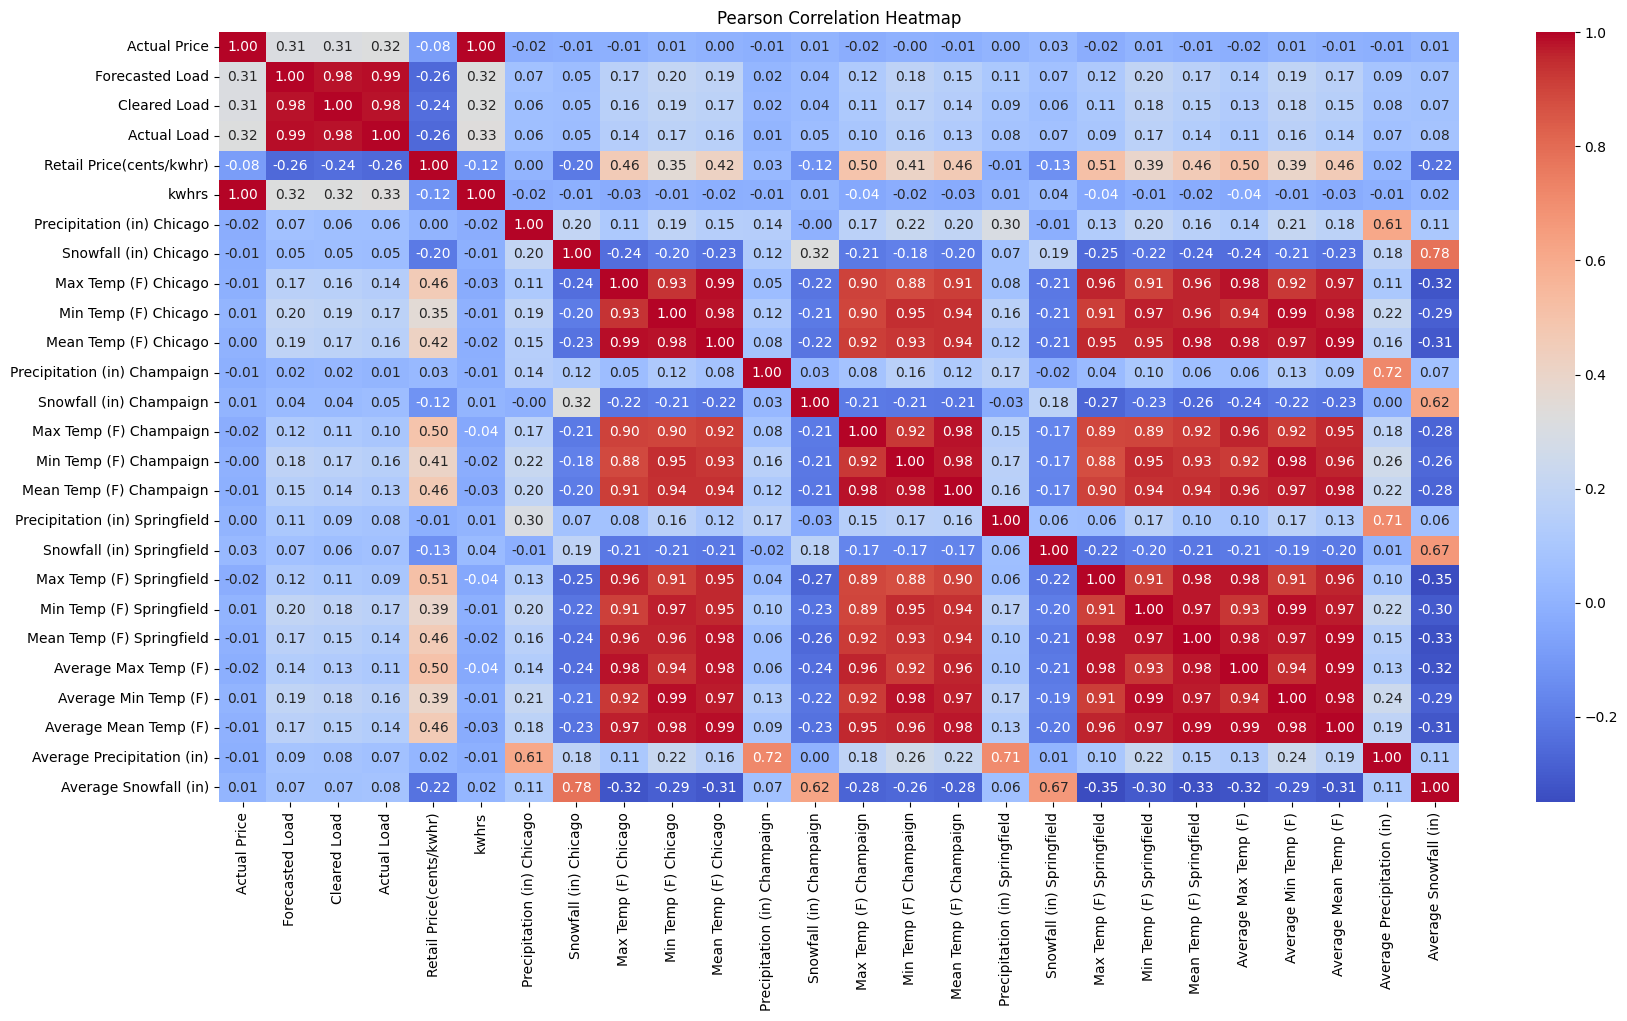

In [ ]:
pearsons_corr()

**Loads/Prices over Time Visuals**

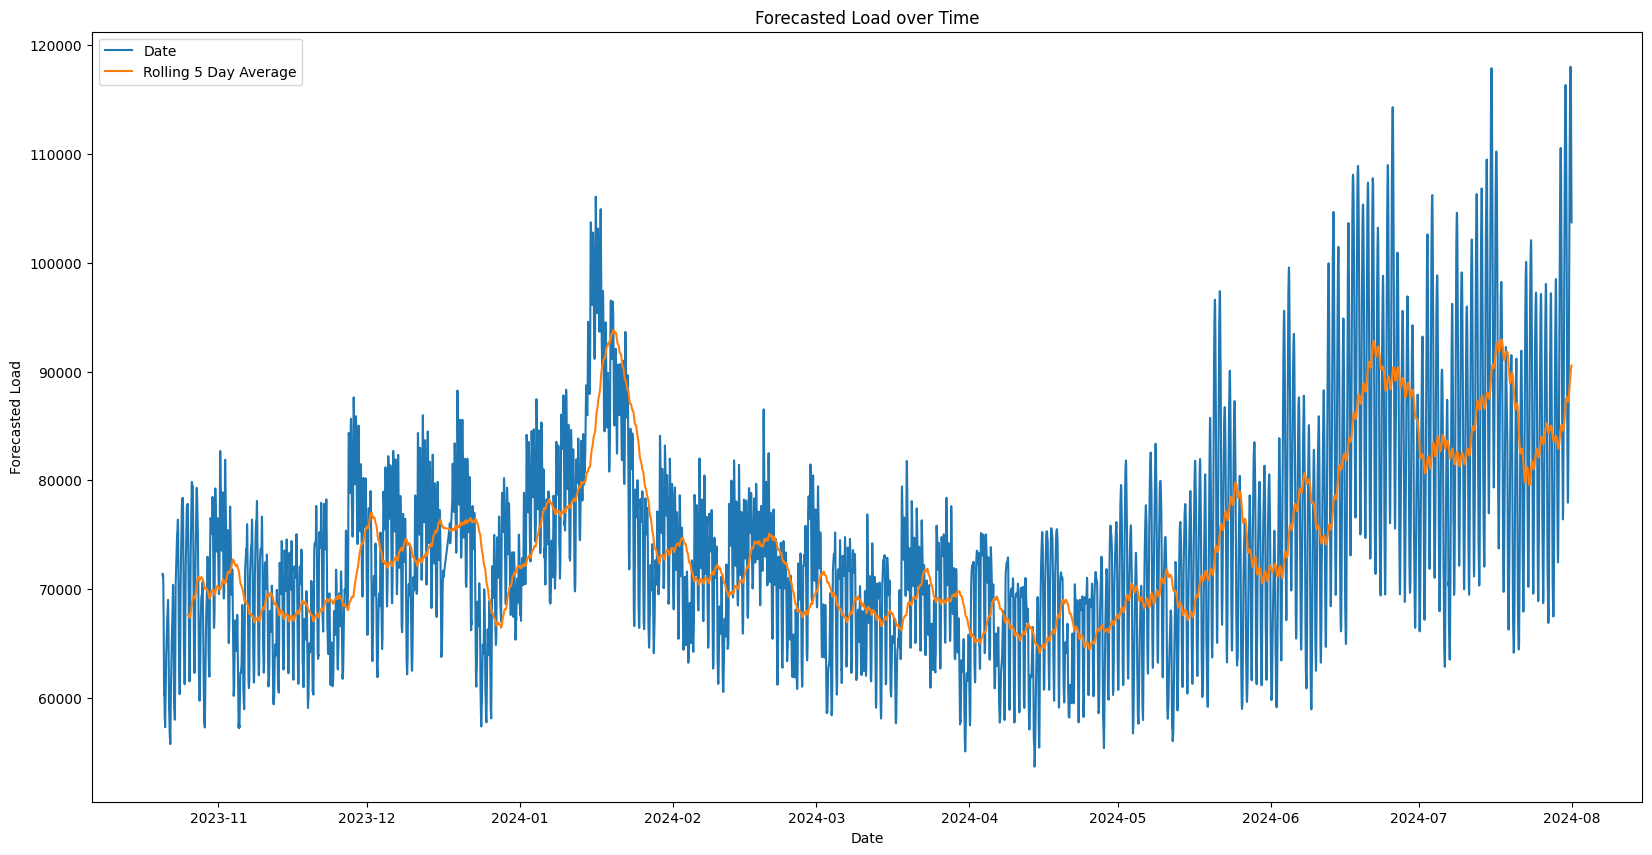

In [ ]:
plot('Date', 'Forecasted Load', 5)

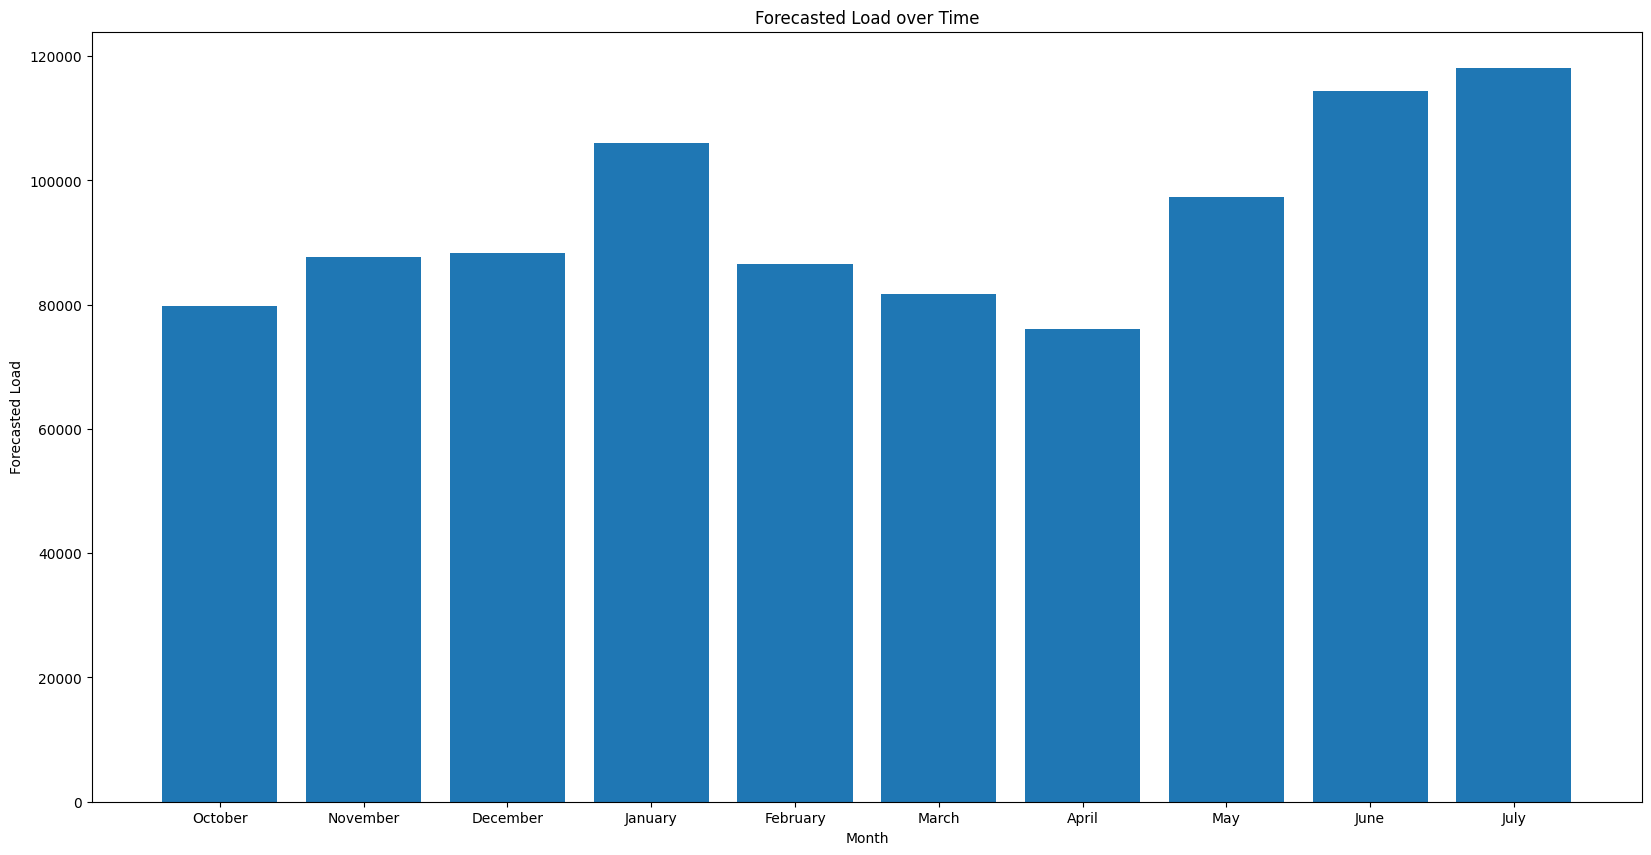

In [ ]:
bar_graph_months('Forecasted Load')

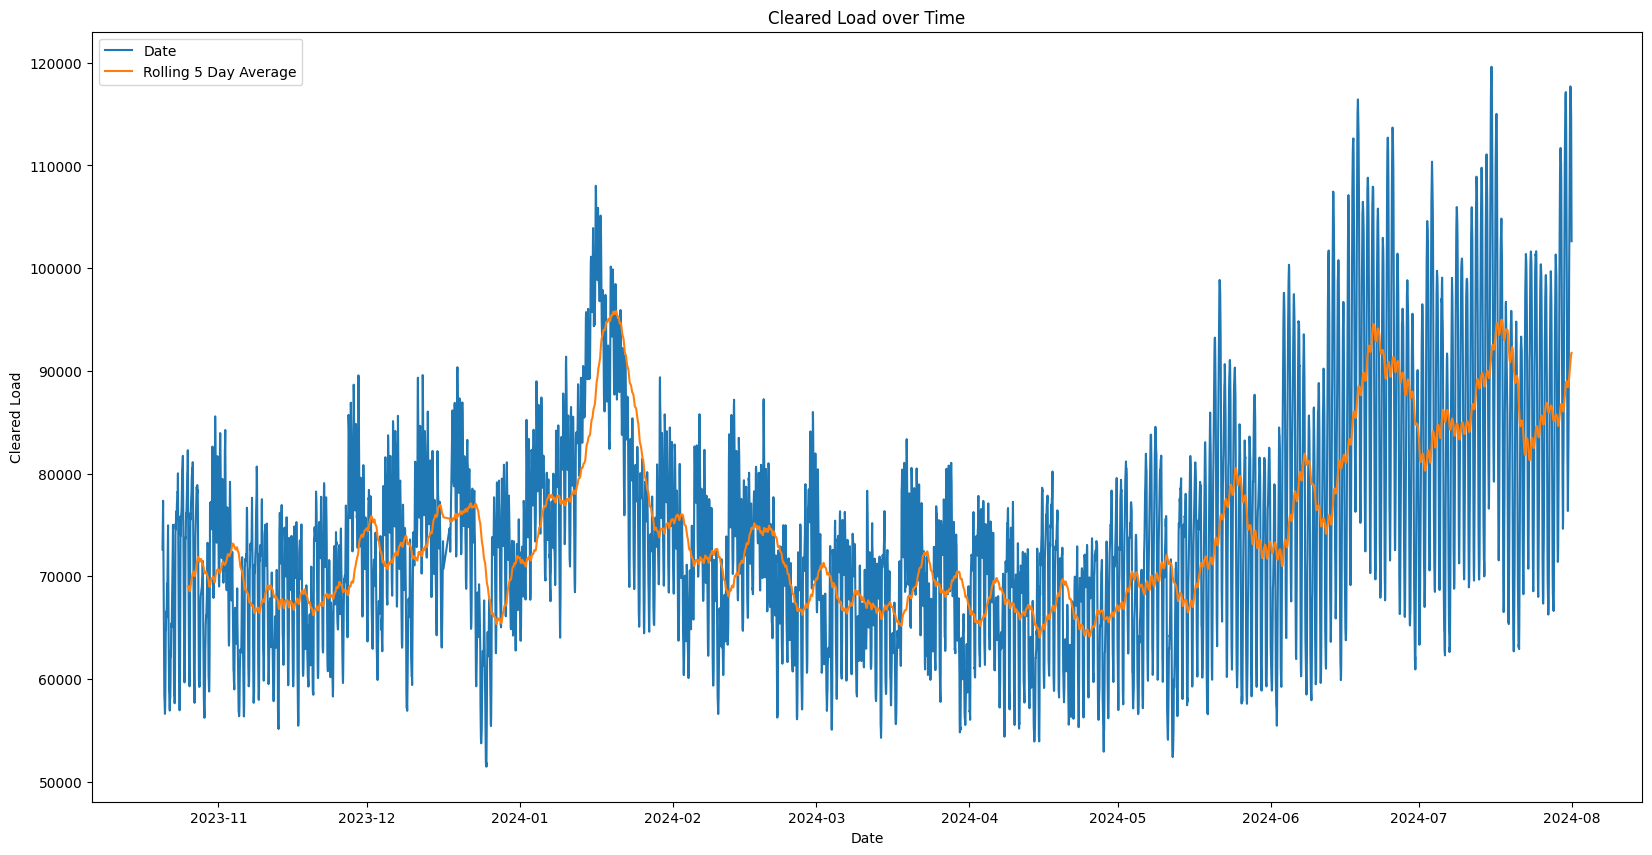

In [ ]:
plot('Date', 'Cleared Load', 5)

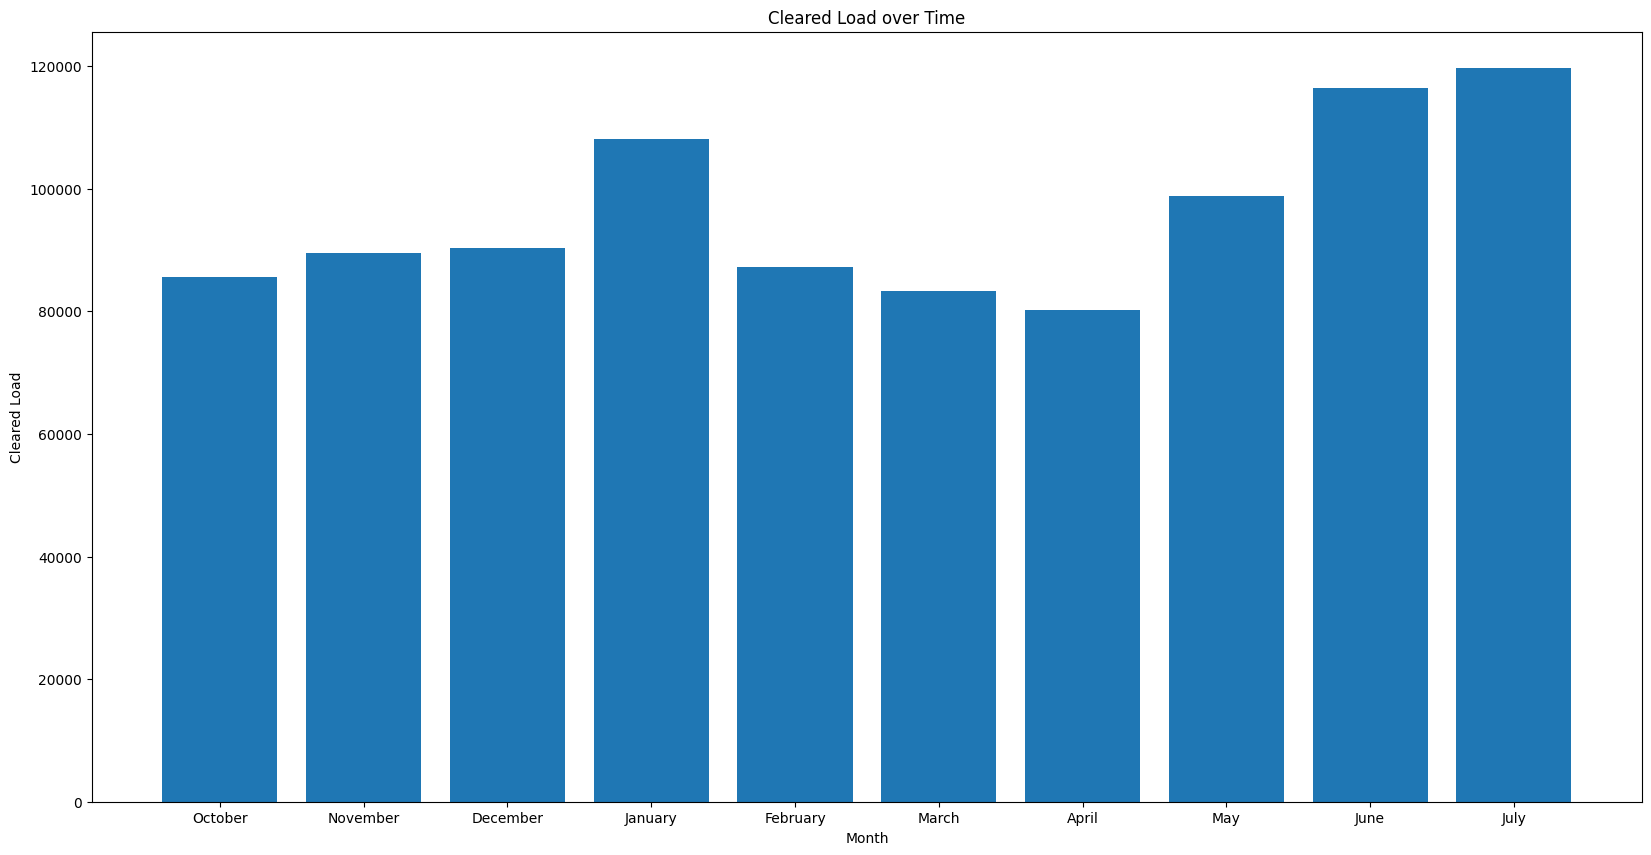

In [ ]:
bar_graph_months('Cleared Load')

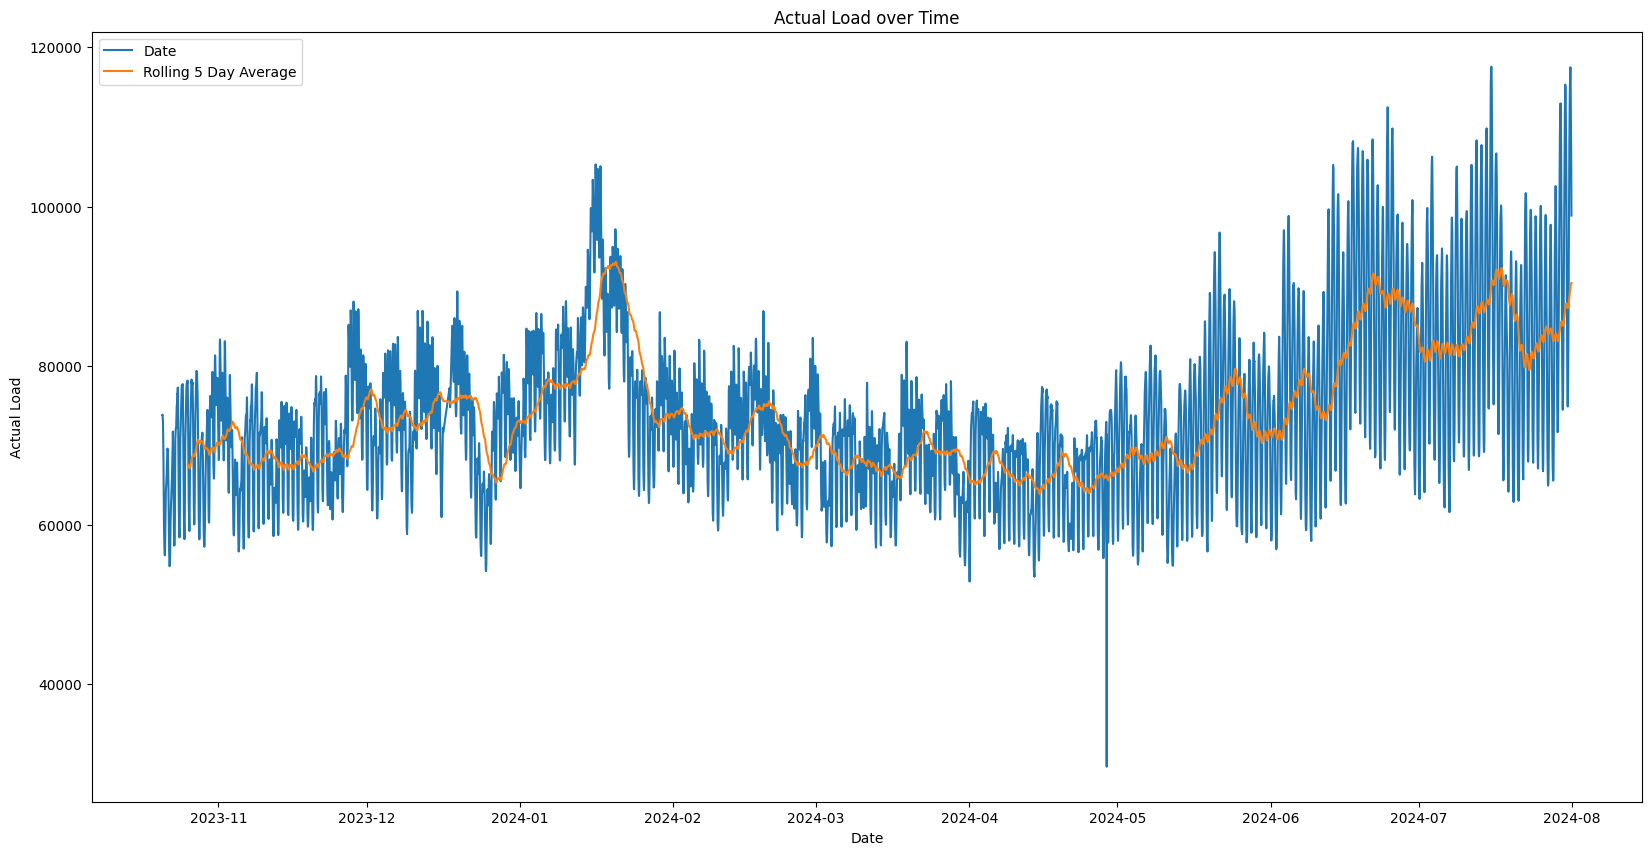

In [ ]:
plot('Date', 'Actual Load', 5)

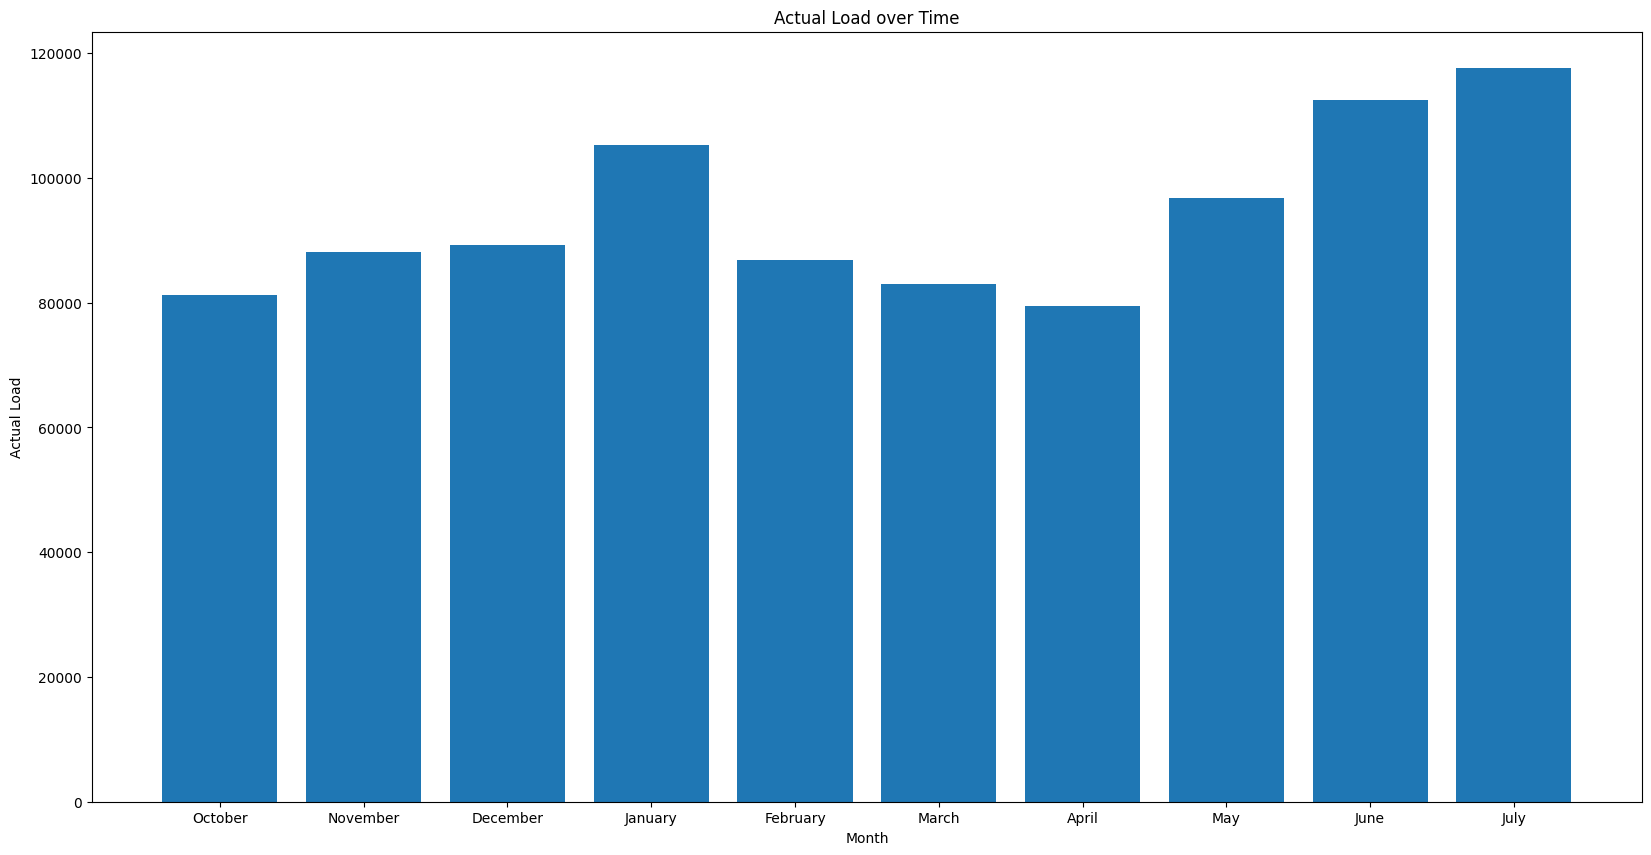

In [ ]:
bar_graph_months('Actual Load')

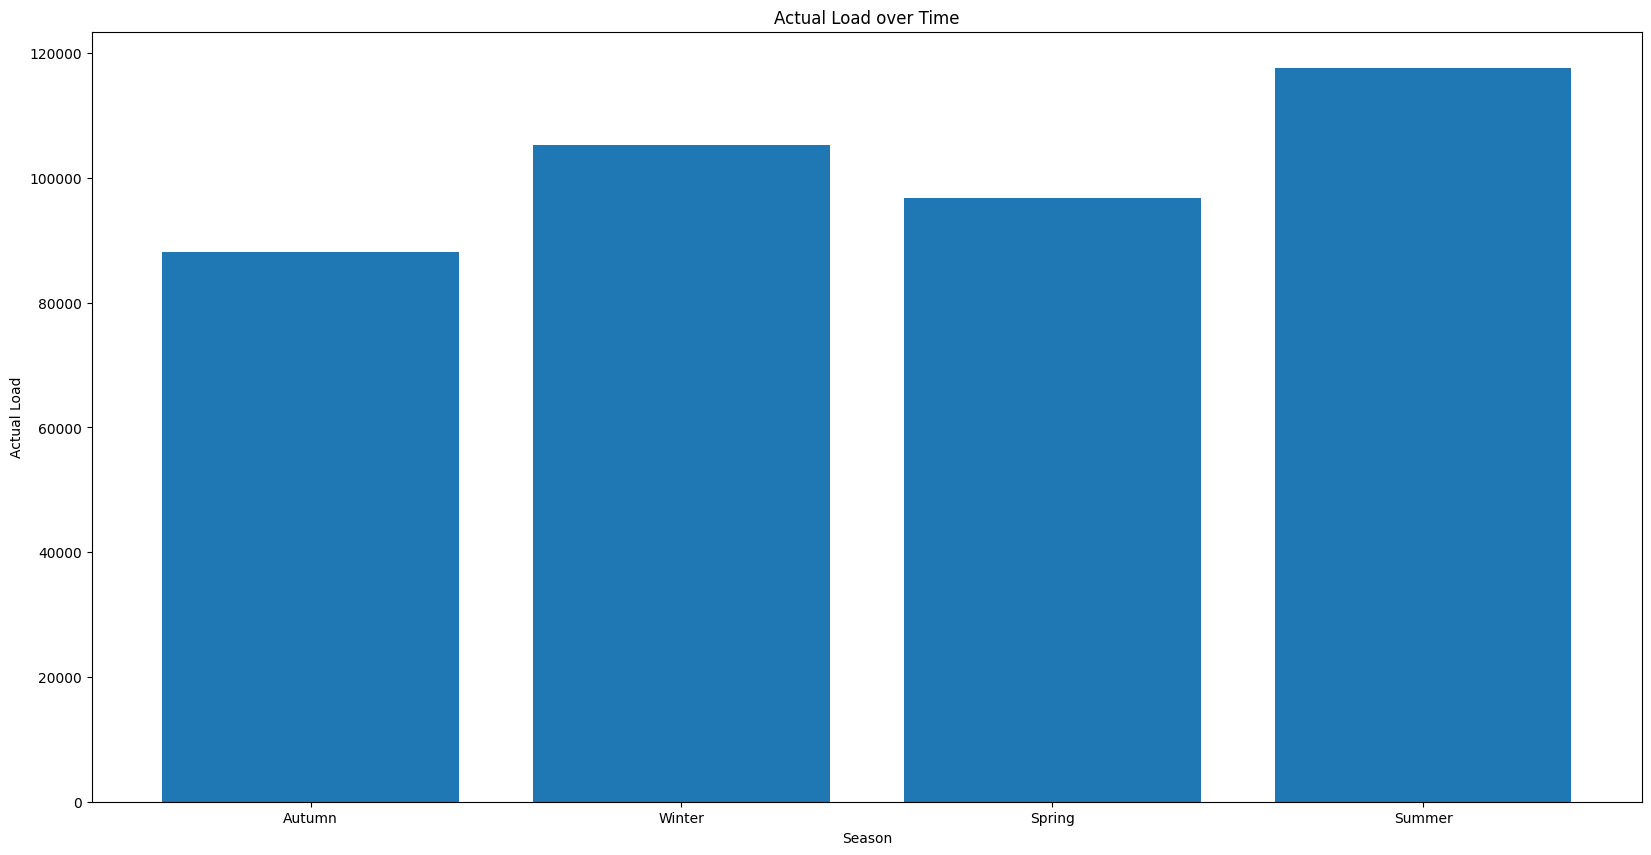

In [ ]:
bar_graph_seasons('Actual Load')

**Temperature Visualizations**

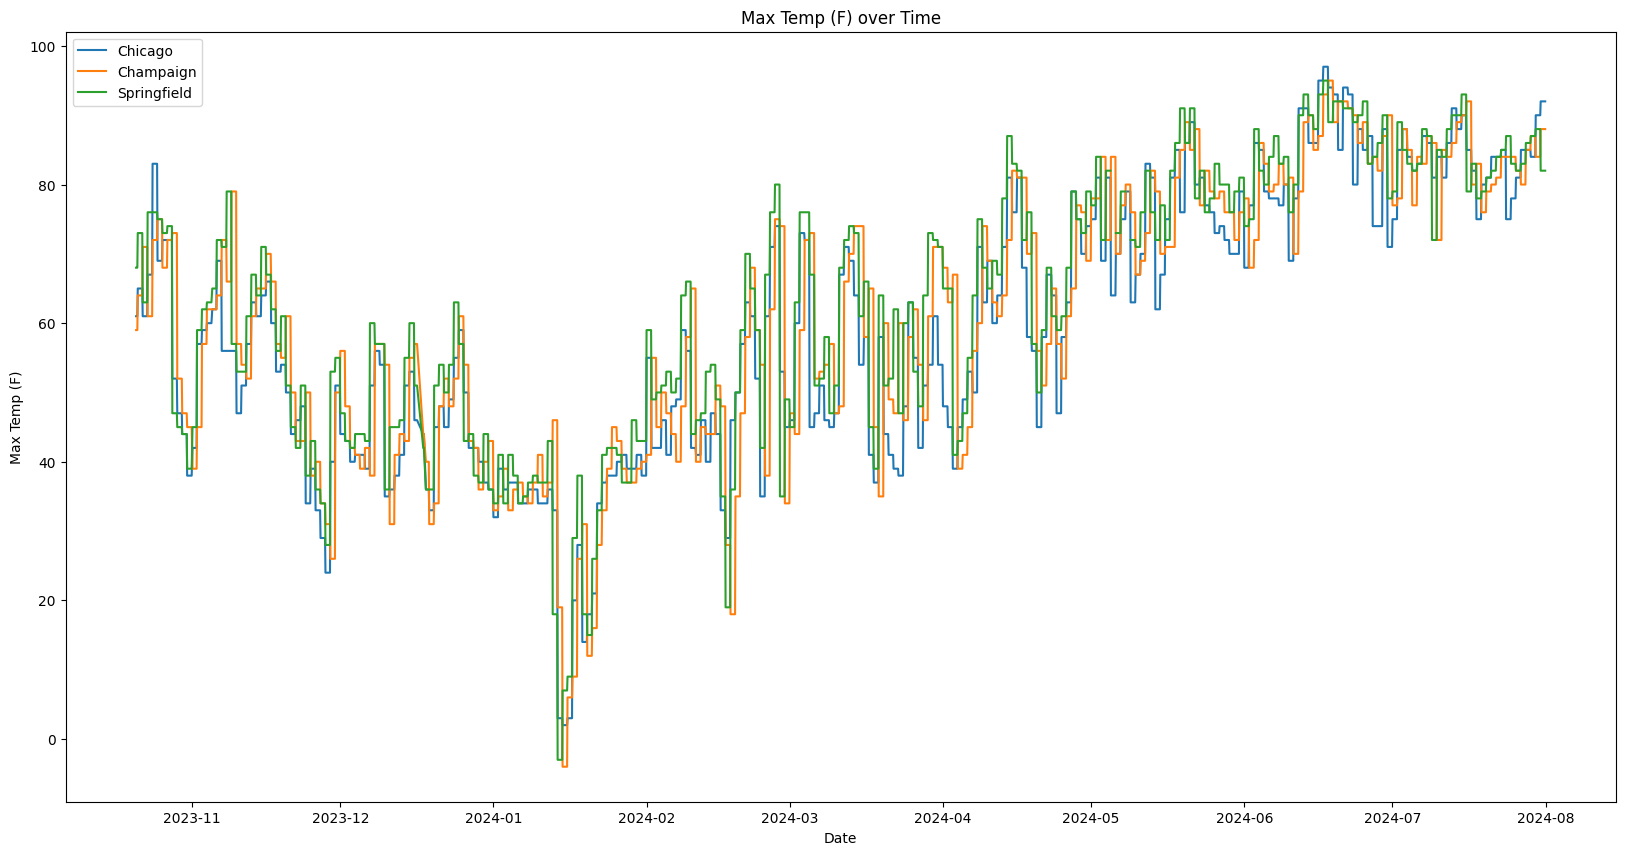

In [ ]:
plot_cities('Date', 'Max Temp (F)')

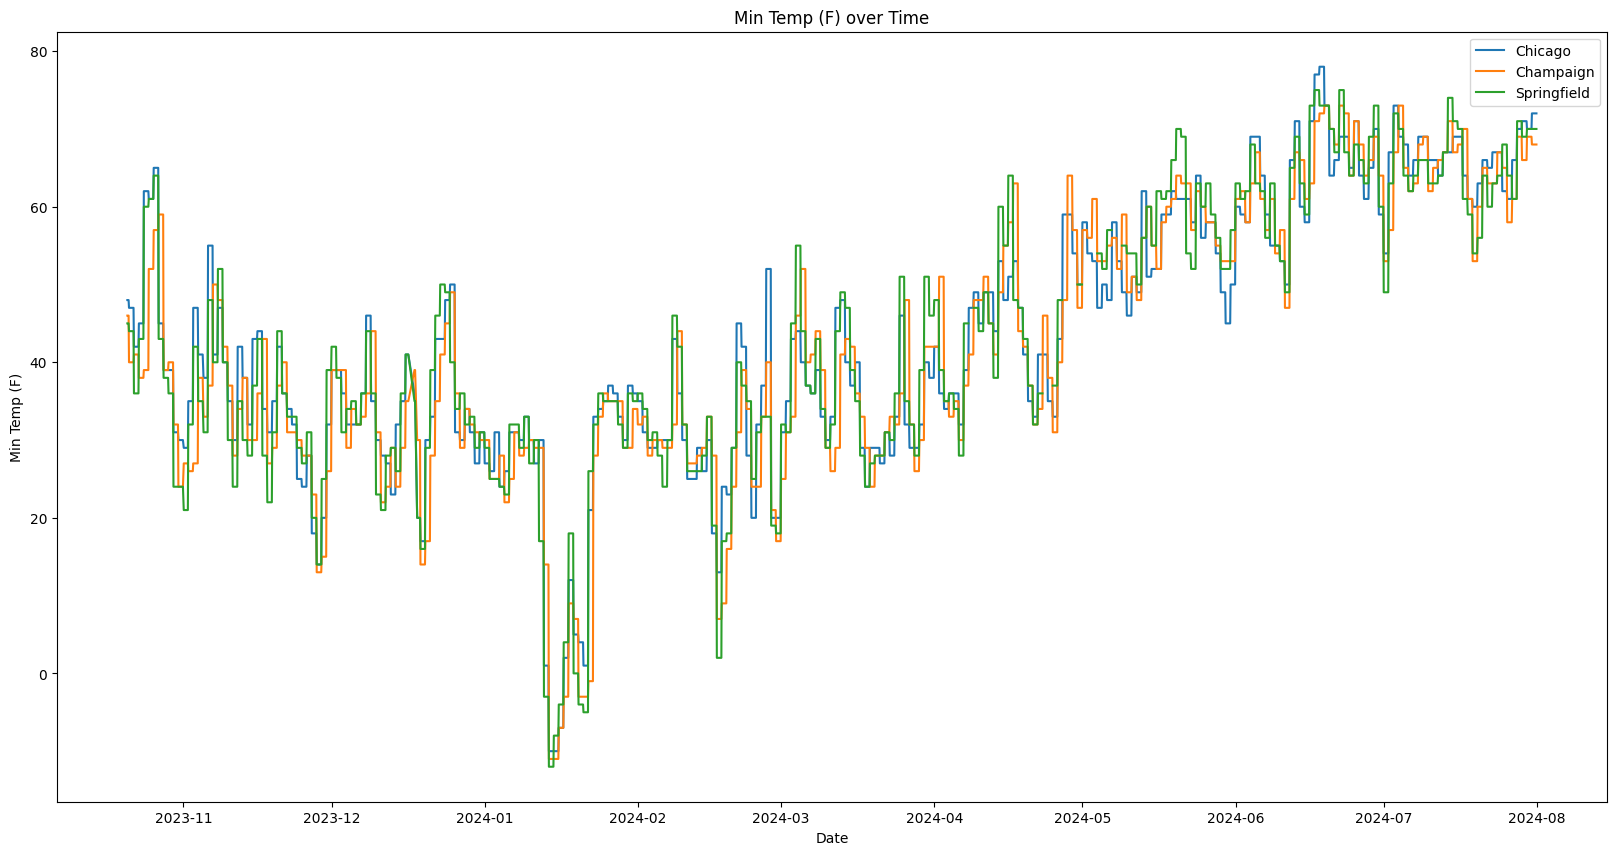

In [ ]:
plot_cities('Date', 'Min Temp (F)')

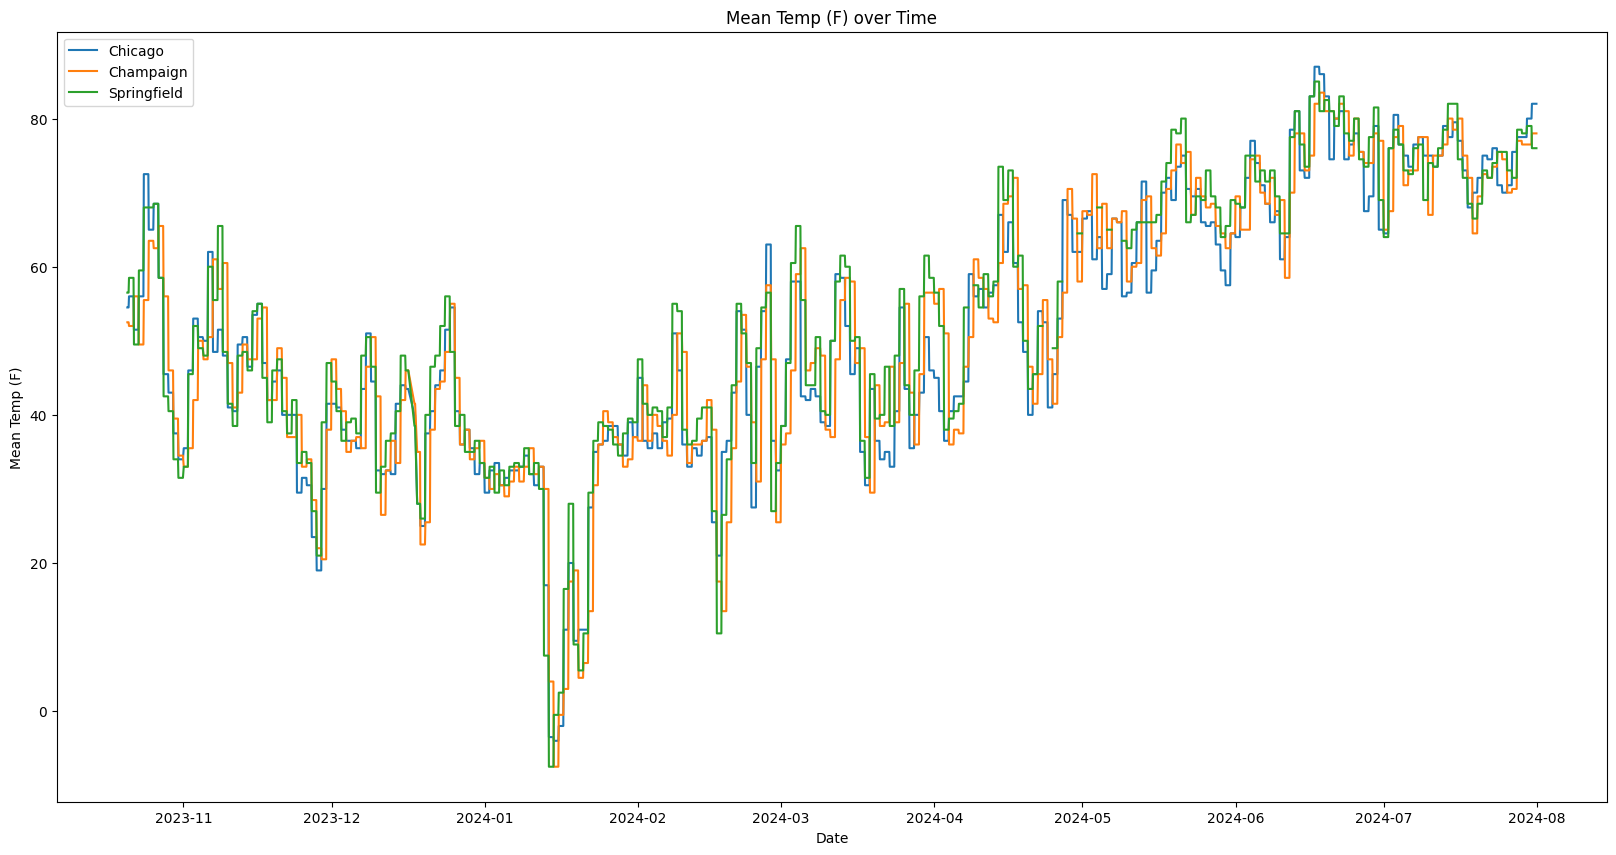

In [ ]:
plot_cities('Date', 'Mean Temp (F)')

**Precipitation Visualizations**

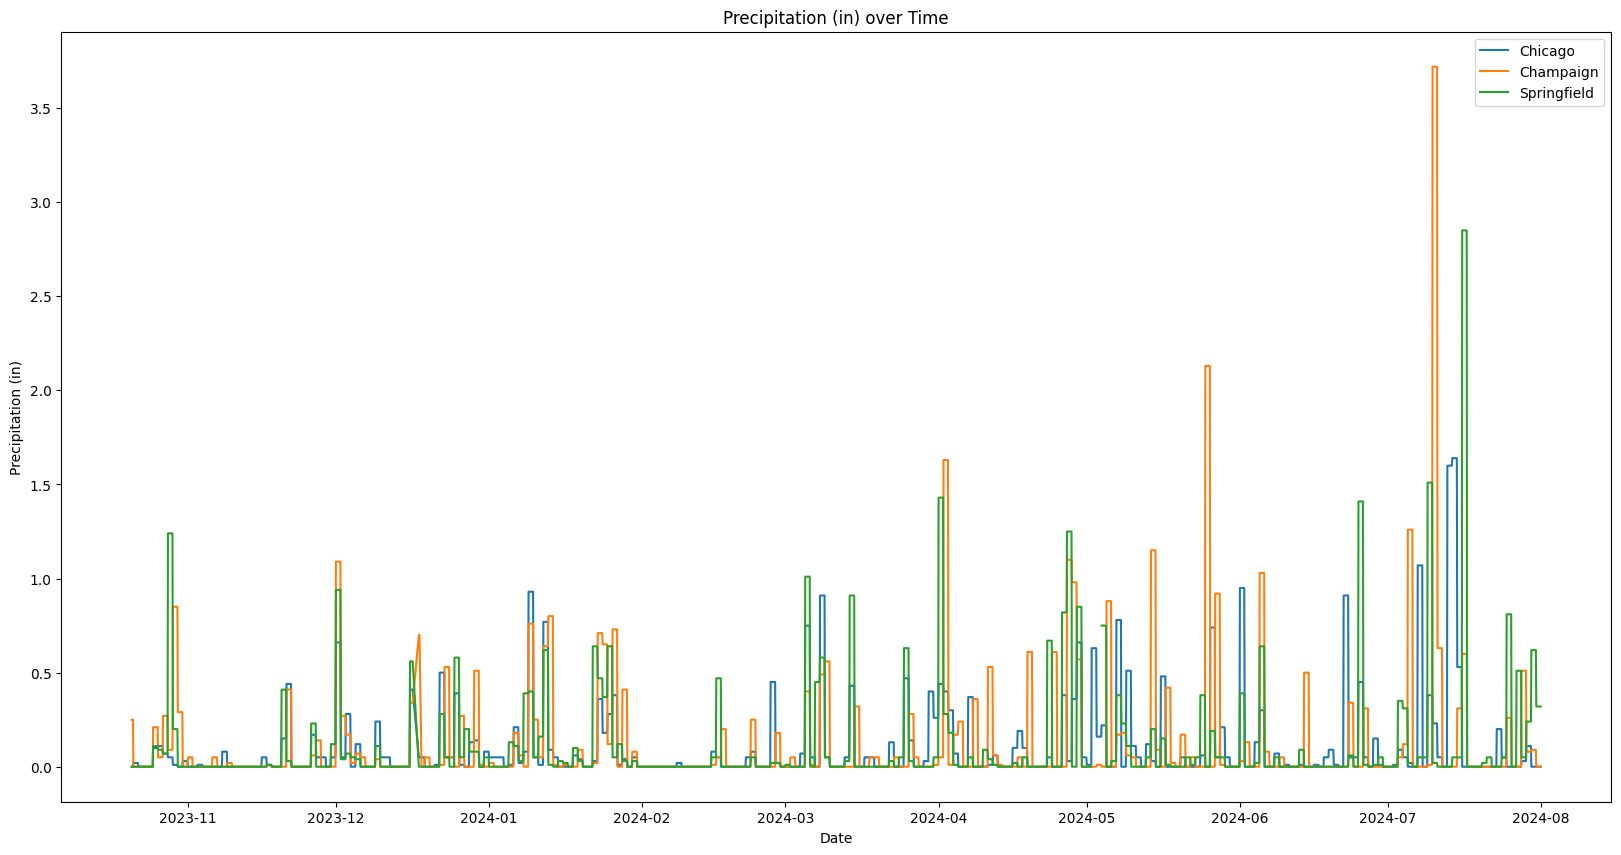

In [ ]:
plot_cities('Date', 'Precipitation (in)')

**Snowfall Visualizations**

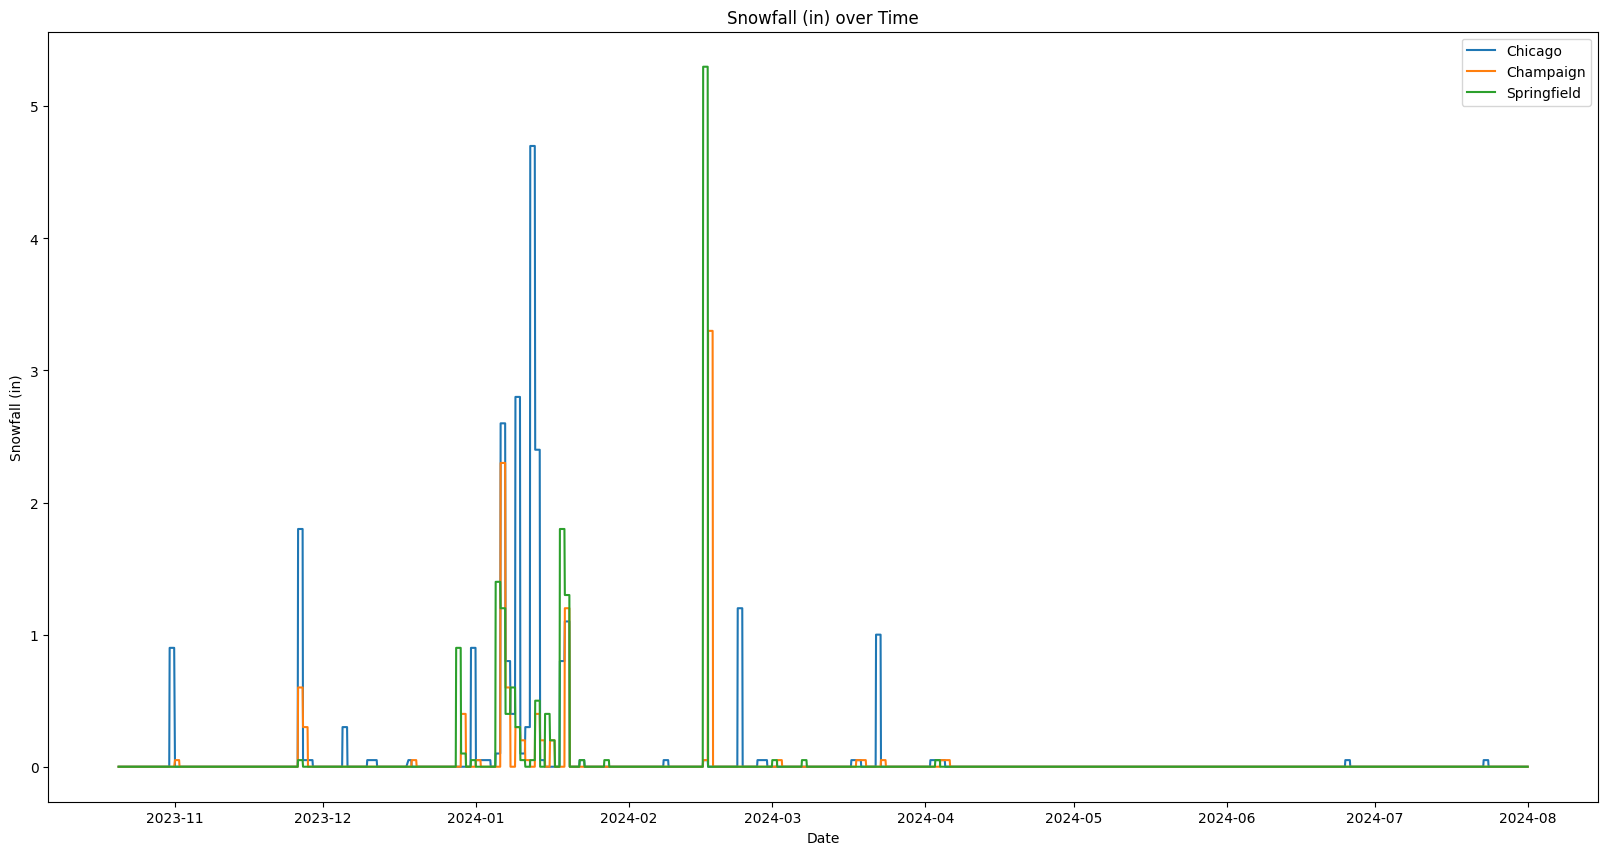

In [ ]:
plot_cities('Date', 'Snowfall (in)')

**Feature correlation**

Average Temperate and Actual Load have an expected distribution

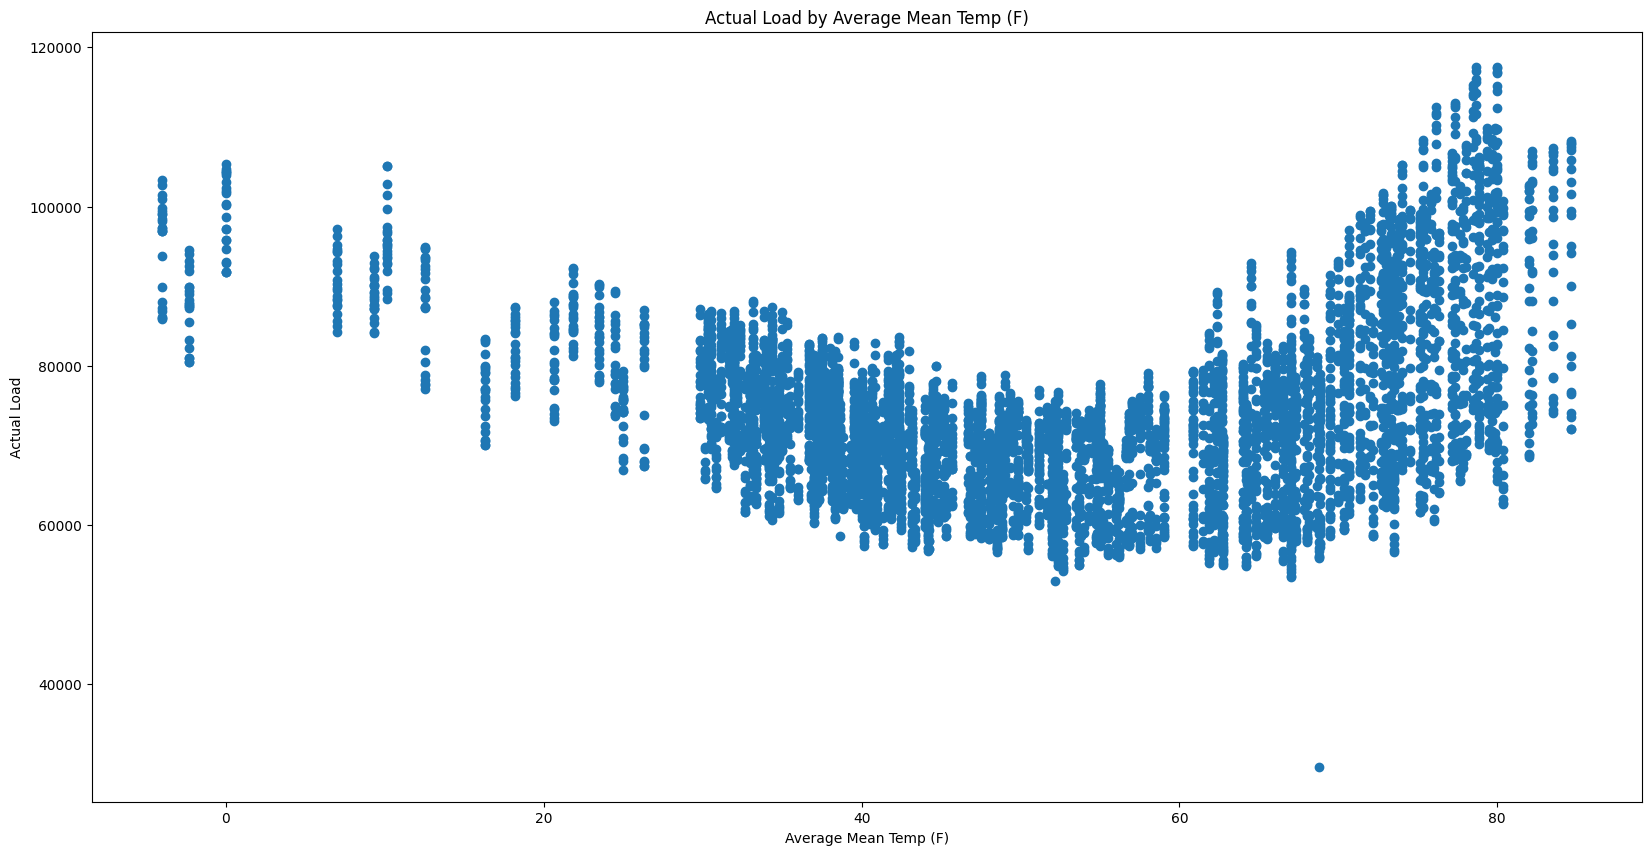

In [ ]:
scatter('Average Mean Temp (F)', 'Actual Load')

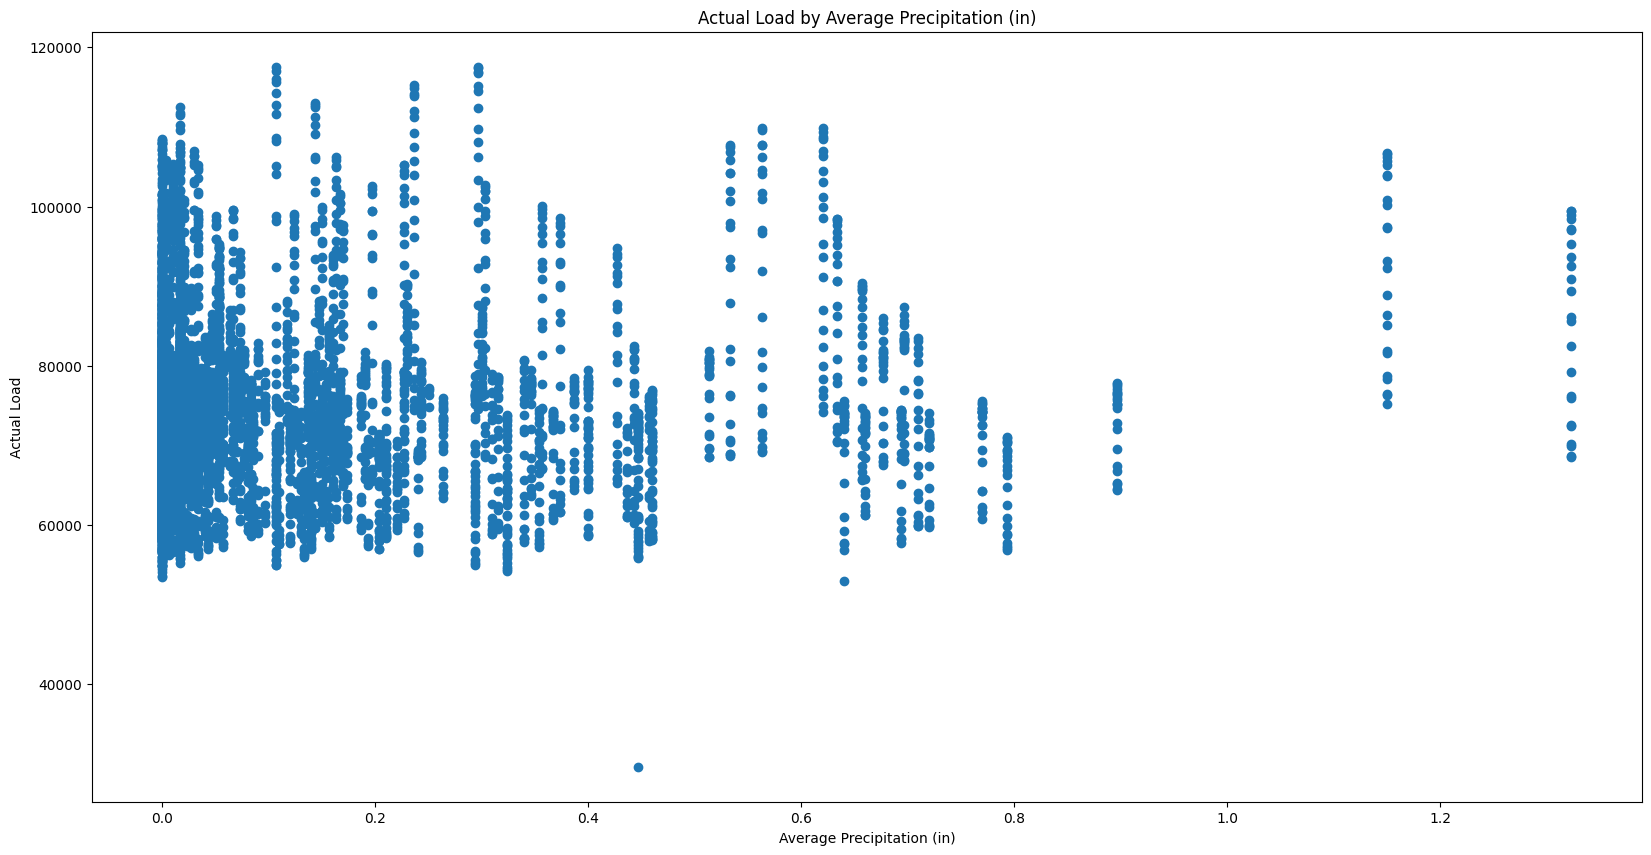

In [ ]:
scatter('Average Precipitation (in)', 'Actual Load')

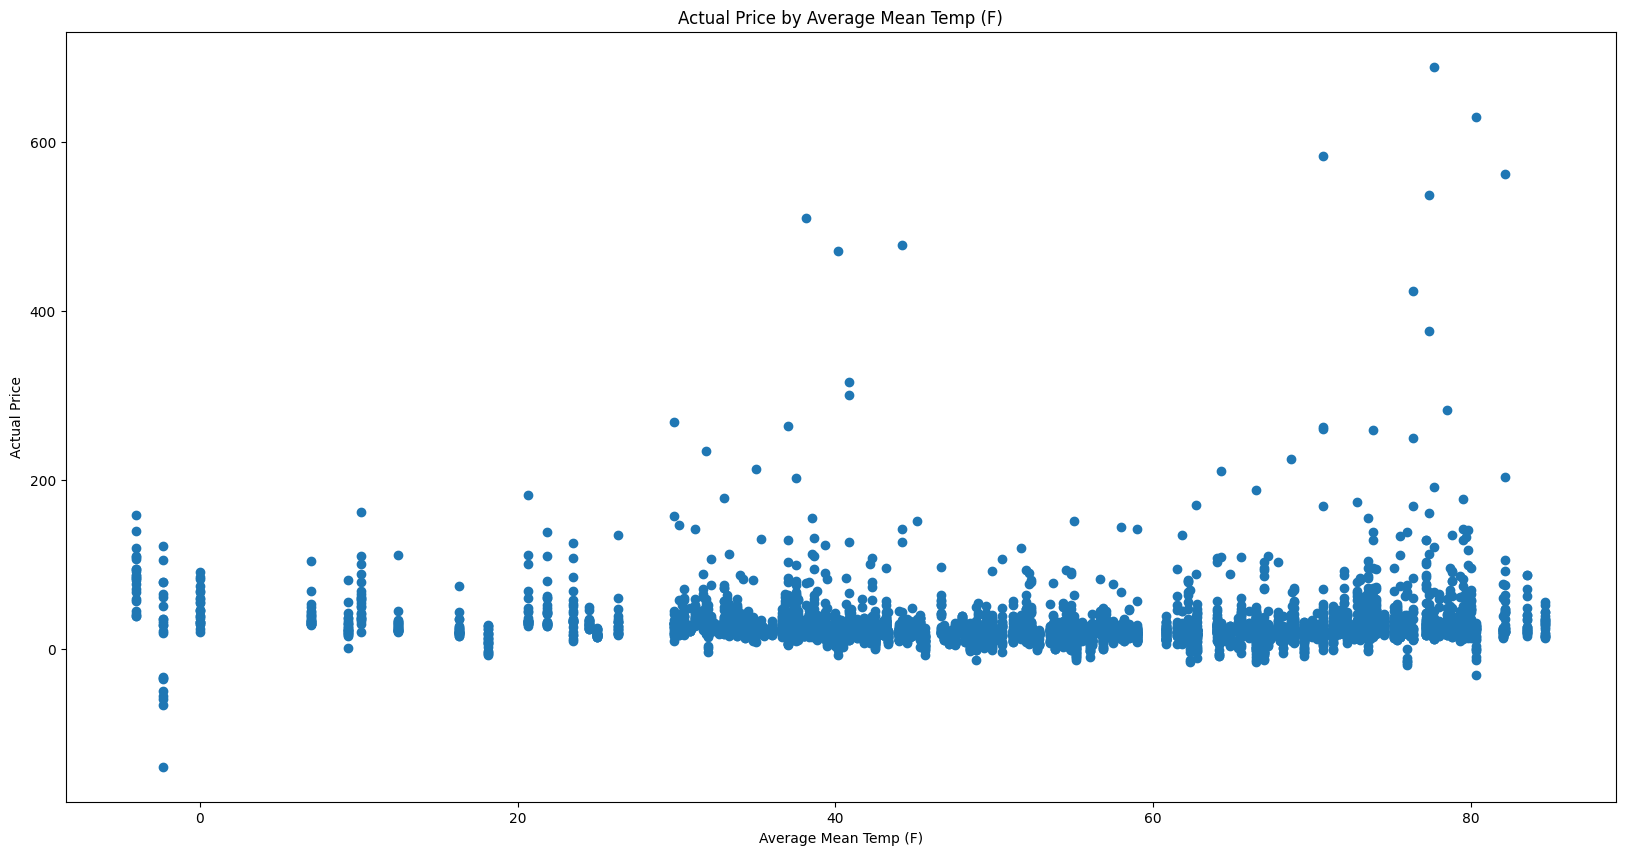

In [ ]:
scatter('Average Mean Temp (F)', 'Actual Price')

### Statistics ###


Summary Statistics:
                                Date  Actual Price  Forecasted Load  \
count                           6432   6432.000000      6432.000000   
mean   2024-03-11 14:42:59.104477440     26.434464     74313.877488   
min              2023-10-20 16:00:00   -140.020000     53673.000000   
25%              2024-01-01 01:45:00     16.810000     67052.000000   
50%              2024-03-11 12:30:00     22.410000     72402.500000   
75%              2024-05-21 22:30:00     28.342500     78751.000000   
max              2024-07-31 22:00:00    689.430000    118032.000000   
std                              NaN     29.311321     10618.271765   

        Cleared Load    Actual Load  Precipitation (in) Chicago  \
count    6432.000000    6432.000000                 6432.000000   
mean    74603.550529   74037.463308                    0.106191   
min     51440.000000   29608.000000                    0.000000   
25%     66385.500000   66617.750000                    0.000000   
50%  

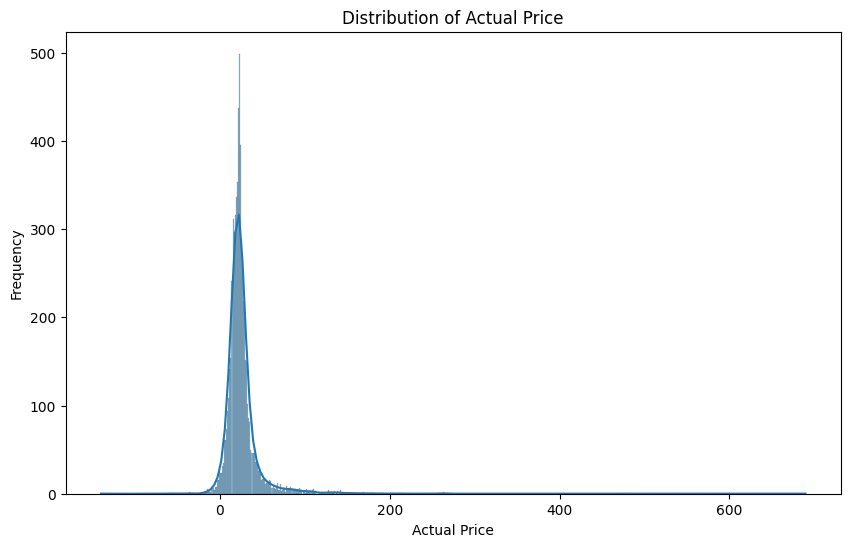

In [ ]:
def summary_statistics(df):
  return df.describe()

def label_distribution(df, label_column):
  return df[label_column].value_counts(normalize=True)

def seasonal_analysis(y_class, df):
  # Define which months belong to each season
  seasons = {
      'Spring': (3, 4, 5),
      'Summer': (6, 7, 8),
      'Autumn': (9, 10, 11),
      'Winter': (12, 1, 2)
  }
  # create a Season column based on the month of each date
  df['Season'] = df['Date'].apply(lambda x:
                                    'Spring' if x.month in seasons['Spring'] else
                                    'Summer' if x.month in seasons['Summer'] else
                                    'Autumn' if x.month in seasons['Autumn'] else
                                    'Winter')
  seasonal_summary = df.groupby('Season')[y_class].describe()
  print(seasonal_summary)
  return seasonal_summary

def plot_distribution(column, df):
  plt.figure(figsize=(10, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

# Display summary statistics for the entire DataFrame
print("Summary Statistics:")
print(summary_statistics(df))

# Perform seasonal analysis on Actual Load
print("\nSeasonal Analysis for Actual Load:")
seasonal_analysis('Actual Load', df)

# Plot the distribution of Actual Price
print("\nDistribution Plot for Actual Price:")
plot_distribution('Actual Price', df)
